In [114]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

In [115]:
path = "..\Dataset\API_Kaggle\plant_growth_data.csv"
df = pd.read_csv(path)
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [116]:
df.head(10)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
5,sandy,8.627622,bi-weekly,none,20.004858,67.618726,0
6,loam,4.444268,daily,organic,25.984533,69.578952,1
7,clay,6.150794,daily,organic,29.291918,69.480907,0
8,loam,4.695214,bi-weekly,none,28.203948,34.560305,1
9,loam,9.178621,weekly,organic,20.598678,54.721015,1


In [117]:
df.tail(10)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
183,clay,8.846,weekly,organic,27.7,56.8,1
184,loam,5.922,bi-weekly,none,26.8,70.6,0
185,sandy,7.321,daily,chemical,20.3,47.3,1
186,clay,9.034,weekly,none,31.7,61.0,0
187,loam,6.127,bi-weekly,organic,22.1,55.7,1
188,sandy,5.652,daily,none,28.0,70.2,0
189,clay,7.528,weekly,chemical,30.5,60.1,1
190,loam,4.934,bi-weekly,none,24.5,61.7,0
191,sandy,8.273,daily,organic,27.9,69.5,1
192,clay,6.732,weekly,none,21.7,56.9,0


In [118]:
# Lihat dimensi dan struktur awal
print("Ukuran data:", df.shape)
print("\nNama kolom:")
print(df.columns.tolist())

print("\nTipe data tiap kolom:")
print(df.dtypes)

Ukuran data: (193, 7)

Nama kolom:
['Soil_Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type', 'Temperature', 'Humidity', 'Growth_Milestone']

Tipe data tiap kolom:
Soil_Type            object
Sunlight_Hours      float64
Water_Frequency      object
Fertilizer_Type      object
Temperature         float64
Humidity            float64
Growth_Milestone      int64
dtype: object


In [119]:
df.describe(include='all')

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
count,193,193.000000,193,193,193.000000,193.000000,193.000000
unique,3,NaN,3,3,NaN,NaN,NaN
top,clay,NaN,daily,none,NaN,NaN,NaN
freq,67,NaN,74,74,NaN,NaN,NaN
mean,NaN,6.826484,NaN,NaN,25.076087,58.098927,0.497409
std,NaN,1.599509,NaN,NaN,5.354170,12.631799,0.501294
min,NaN,4.033133,NaN,NaN,15.200000,30.567682,0.000000
25%,NaN,5.477000,NaN,NaN,20.637095,49.300000,0.000000
50%,NaN,6.833290,NaN,NaN,25.912336,59.182806,0.000000
75%,NaN,8.241144,NaN,NaN,29.757938,69.100000,1.000000


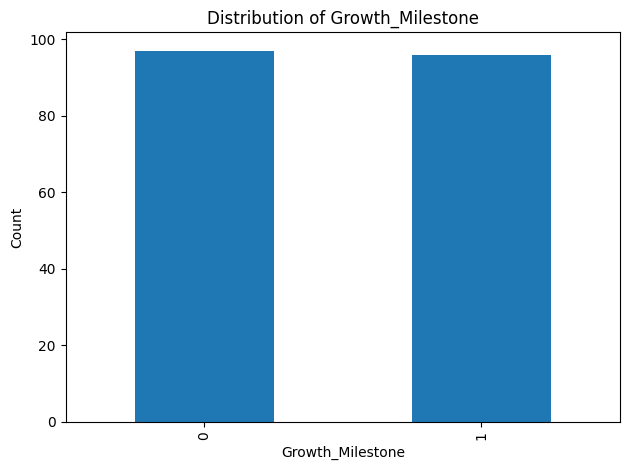

In [120]:
# 1. Target distribution
plt.figure()
df['Growth_Milestone'].value_counts().plot(kind='bar')
plt.title("Distribution of Growth_Milestone")
plt.xlabel("Growth_Milestone")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

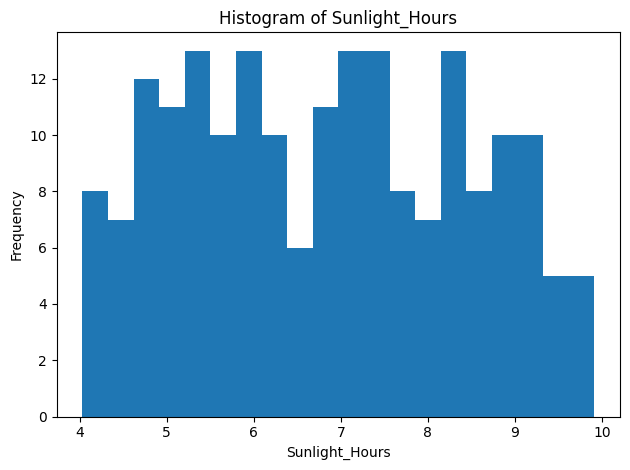

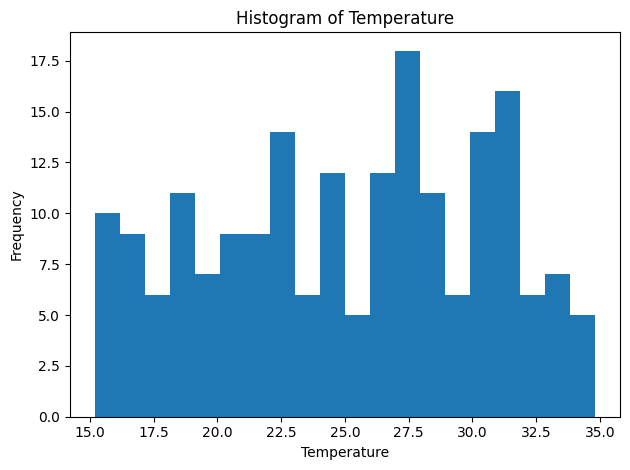

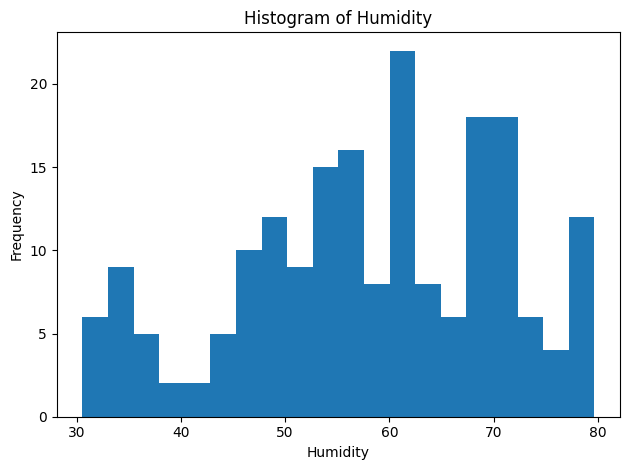

In [121]:
# 2. Histograms for numeric columns
numeric_cols = ['Sunlight_Hours','Temperature','Humidity']
for col in numeric_cols:
    plt.figure()
    df[col].plot(kind='hist', bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

<Figure size 640x480 with 0 Axes>

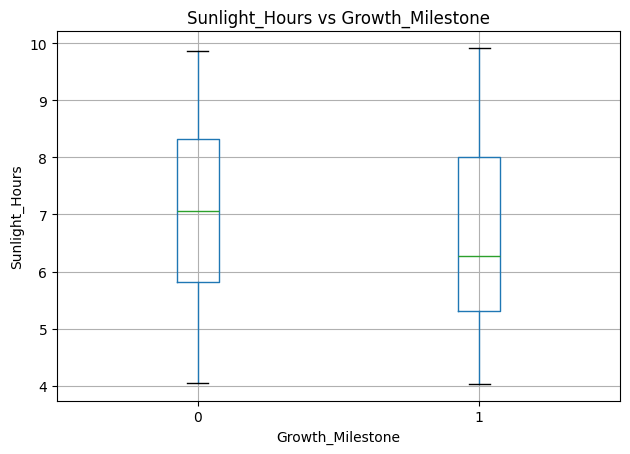

<Figure size 640x480 with 0 Axes>

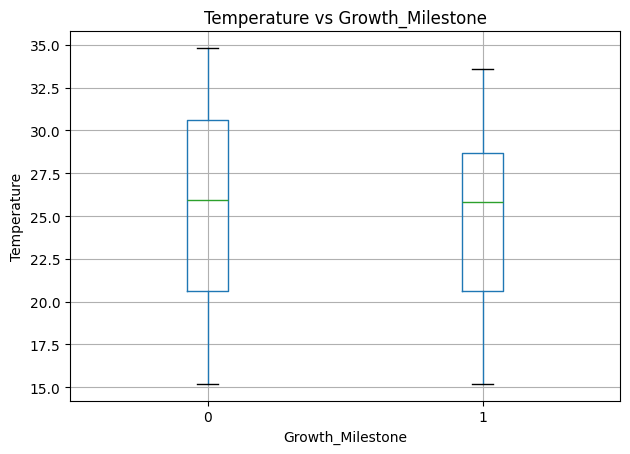

<Figure size 640x480 with 0 Axes>

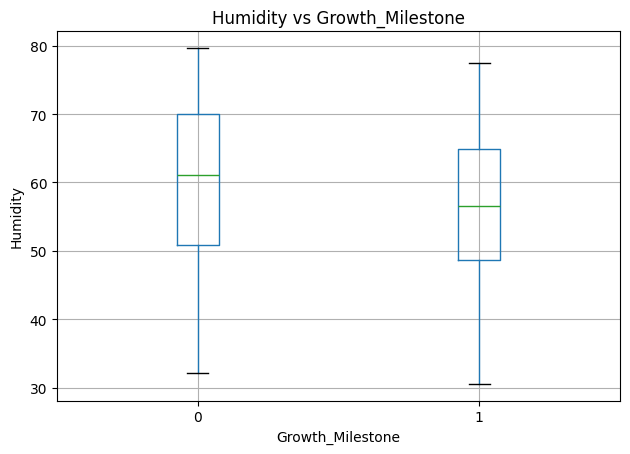

In [122]:
# 3. Boxplots vs target
for col in numeric_cols:
    plt.figure()
    df.boxplot(column=col, by='Growth_Milestone')
    plt.title(f"{col} vs Growth_Milestone")
    plt.suptitle("")
    plt.xlabel("Growth_Milestone")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

<Figure size 640x480 with 0 Axes>

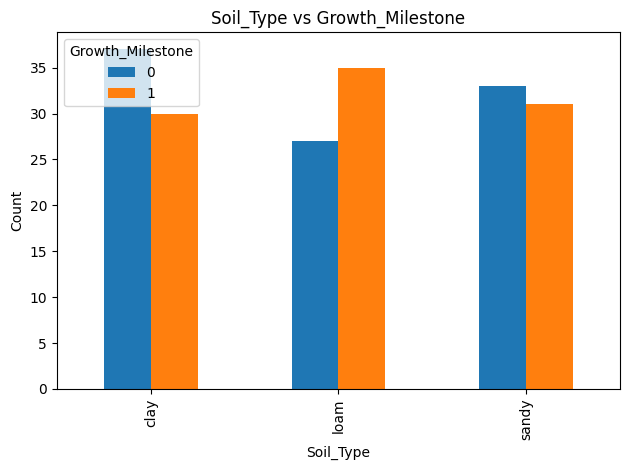

<Figure size 640x480 with 0 Axes>

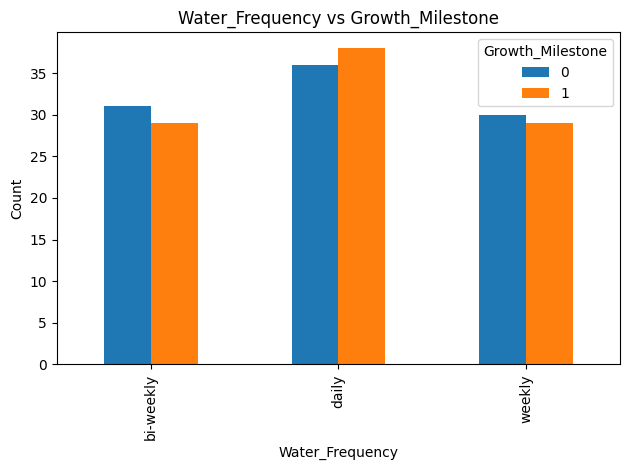

<Figure size 640x480 with 0 Axes>

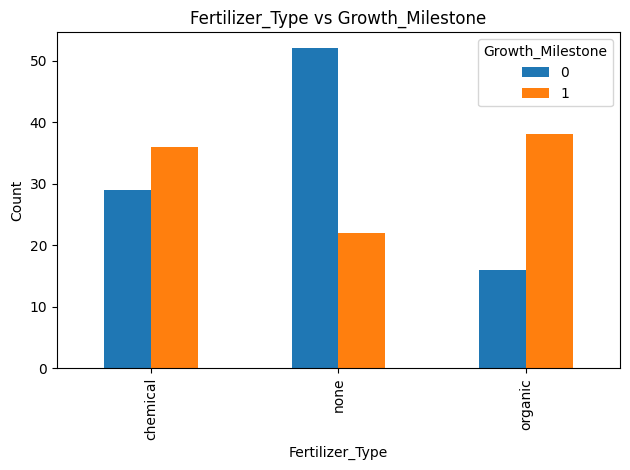

In [123]:
# 4. Bar charts for categorical + target
cat_cols = ['Soil_Type','Water_Frequency','Fertilizer_Type']
for col in cat_cols:
    plt.figure()
    df.groupby([col,'Growth_Milestone']).size().unstack(fill_value=0).plot(kind='bar')
    plt.title(f"{col} vs Growth_Milestone")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

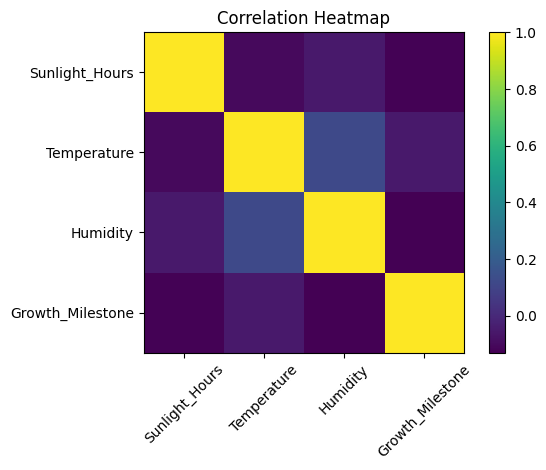

In [124]:
# 5. Correlation heatmap

plt.figure()
corr = df[['Sunlight_Hours','Temperature','Humidity','Growth_Milestone']].corr()
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [125]:
# Data Cleaning

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Validate numeric ranges
print("\nValidity checks:")
print("Sunlight_Hours out of range [0–24]:", 
      ((df['Sunlight_Hours'] < 0) | (df['Sunlight_Hours'] > 24)).sum())
print("Temperature out of range [-10–50°C]:", 
      ((df['Temperature'] < -10) | (df['Temperature'] > 50)).sum())
print("Humidity out of range [0–100%]:", 
      ((df['Humidity'] < 0) | (df['Humidity'] > 100)).sum())
print("Invalid Growth_Milestone (not 0/1):", 
      (~df['Growth_Milestone'].isin([0, 1])).sum())

# Check categorical levels
print("\nUnique values in categorical features:")
for col in ['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']:
    print(f"{col}: {sorted(df[col].unique())}")



Missing values per column:
Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

Number of duplicate rows: 0

Validity checks:
Sunlight_Hours out of range [0–24]: 0
Temperature out of range [-10–50°C]: 0
Humidity out of range [0–100%]: 0
Invalid Growth_Milestone (not 0/1): 0

Unique values in categorical features:
Soil_Type: ['clay', 'loam', 'sandy']
Water_Frequency: ['bi-weekly', 'daily', 'weekly']
Fertilizer_Type: ['chemical', 'none', 'organic']


In [126]:
# Buat salinan dataset
df_encoded = df.copy()

# Gunakan pd.get_dummies untuk One-Hot Encoding
df_encoded = pd.get_dummies(
    df_encoded,
    columns=['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'],
    drop_first=False
)

In [127]:
#pisahkan fitur dan target
X = df_encoded.drop('Growth_Milestone', axis=1)
y = df_encoded['Growth_Milestone']

#Membagi dataset menjadi data latih dan data uji
#dengan perbandingan 70% : 30%

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=3, stratify=y  # ← added stratify for balance
)

print ("Ukuran X_trainset = ", X_train.shape)
print ("Ukuran y_trainset = ", y_train. shape)

print ("Ukuran X_testset = ", X_test. shape)
print ("Ukuran y_testset = ", y_test.shape)

Ukuran X_trainset =  (135, 12)
Ukuran y_trainset =  (135,)
Ukuran X_testset =  (58, 12)
Ukuran y_testset =  (58,)


In [128]:
# 1. Melatih Model (Default)
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

print("Model Naive Bayes (Gaussian) telah dilatih dengan parameter default:")
print(f"  - var_smoothing: {nb_model.var_smoothing}")
print(f"  - priors: {nb_model.priors}")

Model Naive Bayes (Gaussian) telah dilatih dengan parameter default:
  - var_smoothing: 1e-09
  - priors: None


In [129]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f"\nAkurasi Naive Bayes (default): {round(accuracy_nb * 100, 2)} %")
print("\nClassification Report (default):")
print(report_nb)


Akurasi Naive Bayes (default): 56.9 %

Classification Report (default):
              precision    recall  f1-score   support

           0       0.57      0.59      0.58        29
           1       0.57      0.55      0.56        29

    accuracy                           0.57        58
   macro avg       0.57      0.57      0.57        58
weighted avg       0.57      0.57      0.57        58



In [130]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter untuk tuning (hanya nilai kecil)
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Hindari nilai besar
}

# Gunakan GridSearchCV
nb_grid = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Latih dengan tuning
nb_grid.fit(X_train, y_train)

# Ambil model terbaik
best_nb = nb_grid.best_estimator_

# Prediksi dengan model terbaik
y_pred_nb_tuned = best_nb.predict(X_test)
accuracy_nb_tuned = accuracy_score(y_test, y_pred_nb_tuned)
report_nb_tuned = classification_report(y_test, y_pred_nb_tuned)

print(f"\nParameter terbaik: {nb_grid.best_params_}")
print(f"Akurasi Naive Bayes (setelah tuning): {round(accuracy_nb_tuned * 100, 2)} %")
print("\nClassification Report (tuned):")
print(report_nb_tuned)


Parameter terbaik: {'var_smoothing': 1e-09}
Akurasi Naive Bayes (setelah tuning): 56.9 %

Classification Report (tuned):
              precision    recall  f1-score   support

           0       0.57      0.59      0.58        29
           1       0.57      0.55      0.56        29

    accuracy                           0.57        58
   macro avg       0.57      0.57      0.57        58
weighted avg       0.57      0.57      0.57        58

